# **Checkpoint 2**

Group Name: **Eagle_USU**

Substantial investments are being made to enhance building efficiency, reducing costs and emissions. But are these improvements truly effective? That’s where this competition plays a role. Under pay-for-performance financing, building owners pay based on the difference between their actual energy consumption and what they would have used without retrofits. This baseline consumption must be estimated using a model.

In this competition, our goal is to develop precise models for metered energy usage in buildings, covering chilled water, electricity, hot water, and steam meters. The dataset includes information from over 1,000 buildings spanning three years. More accurate estimates of energy savings will encourage large-scale investors and financial institutions to support advancements in building efficiency.

Participants will work with two primary datasets—train.csv and test.csv—similar to other competitions. Additionally, the following supporting files are provided:
	•	building_metadata.csv – Contains metadata about the buildings
	•	weather.csv – Provides weather-related information

Notebook Objective:

This notebook aims to explore the dataset, perform preprocessing, and generate initial predictions.

Kaggle Link:
https://www.kaggle.com/competitions/ashrae-energy-prediction

## Loading the dataset

In [1]:
import numpy as np
import pandas as pd


path_data = ""

train_data = pd.read_csv(path_data + 'train.csv')
test_data = pd.read_csv(path_data + 'test.csv')
building_metadata = pd.read_csv(path_data + 'building_metadata.csv')
weather_train = pd.read_csv(path_data + 'weather_train.csv')
weather_test = pd.read_csv(path_data + 'weather_test.csv')
sample_submission = pd.read_csv(path_data + 'sample_submission.csv')

## Showing the dataset

In [2]:
display(train_data.head())
display(test_data.head())
display(sample_submission)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [3]:
display(building_metadata.head())

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [4]:
display(weather_train.head())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [5]:
display(weather_test.head())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [6]:
display(sample_submission.head())

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## Exploratory Data Analysis

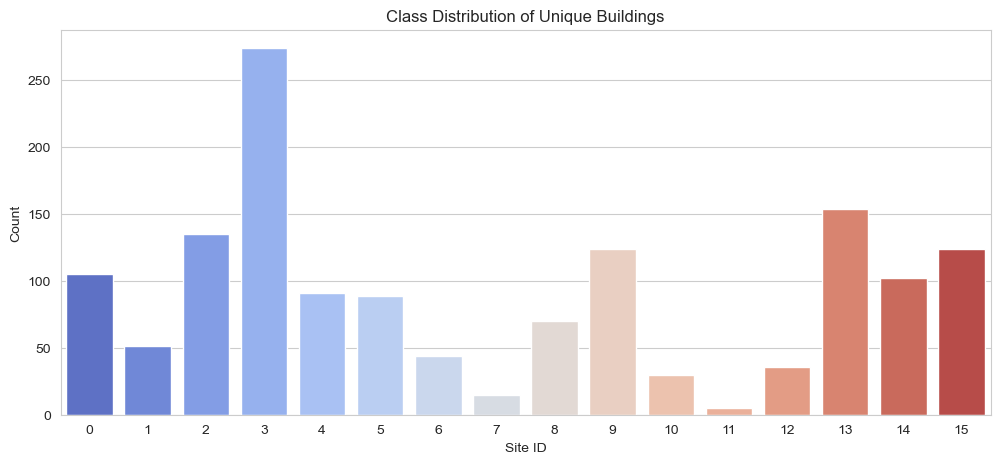

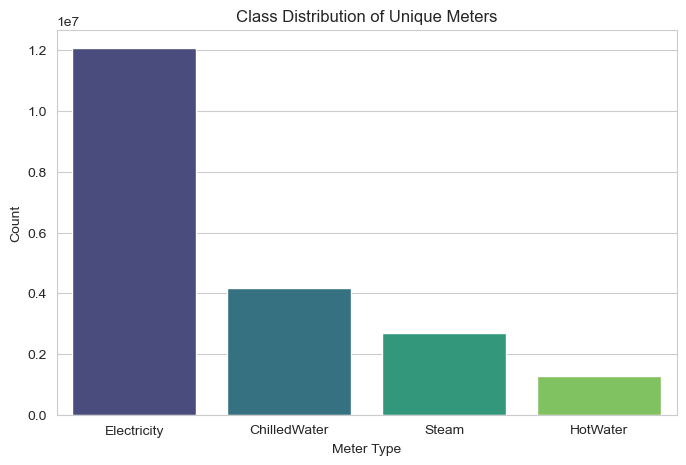

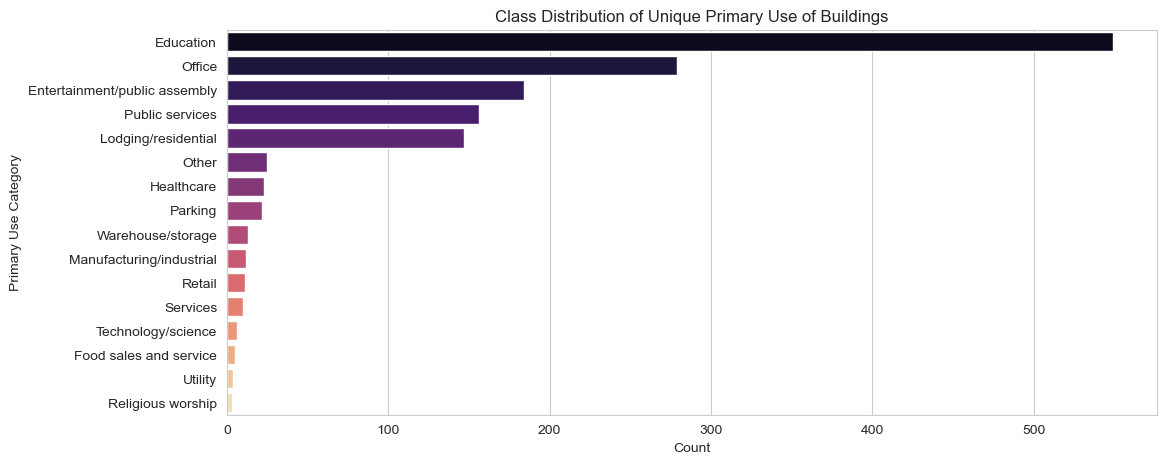

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

### 1. Class Distribution of Unique Buildings
plt.figure(figsize=(12, 5))
sns.countplot(x=building_metadata["site_id"], palette="coolwarm")
plt.xlabel("Site ID")
plt.ylabel("Count")
plt.title("Class Distribution of Unique Buildings")
plt.savefig("UniqueBuildings.png")
plt.show()

### 2. Class Distribution of Unique Meters
# Mapping meter types to categories
meter_mapping = {0: "Electricity", 1: "ChilledWater", 2: "Steam", 3: "HotWater"}
train_data["meter_category"] = train_data["meter"].map(meter_mapping)
test_data["meter_category"] = test_data["meter"].map(meter_mapping)
train_data.drop(columns=["meter"], inplace=True)
test_data.drop(columns=["meter"], inplace=True)

plt.figure(figsize=(8, 5))
sns.countplot(x=train_data["meter_category"], palette="viridis", order=["Electricity", "ChilledWater", "Steam", "HotWater"])
plt.xlabel("Meter Type")
plt.ylabel("Count")
plt.title("Class Distribution of Unique Meters")
plt.savefig("UniqueMeters.png")
plt.show()

### 3. Class Distribution of Unique Primary Use of Buildings
plt.figure(figsize=(12, 5))
sns.countplot(y=building_metadata["primary_use"], palette="magma", order=building_metadata["primary_use"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Primary Use Category")
plt.title("Class Distribution of Unique Primary Use of Buildings")
plt.savefig("UseofBuildings.png")
plt.show()

Number of Unique Buildings: 1449
Number of Unique Primary Use Categories: 16


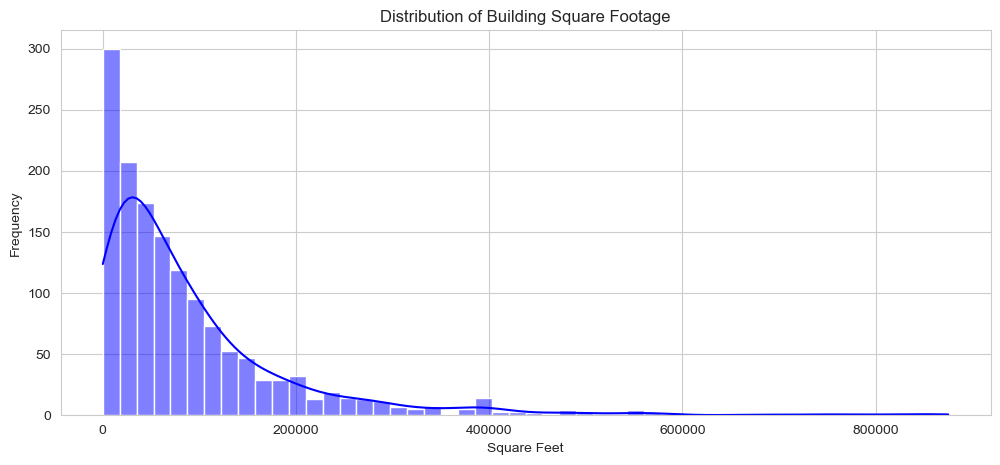

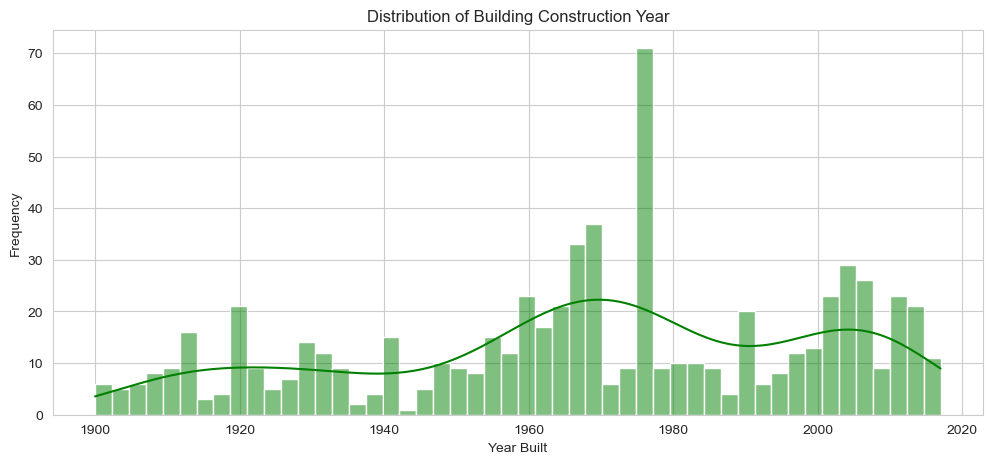

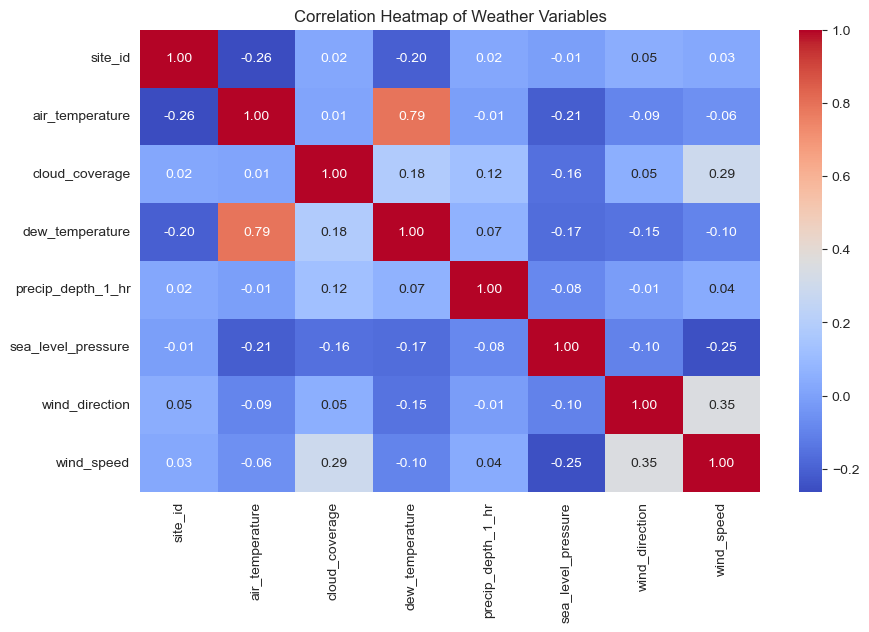

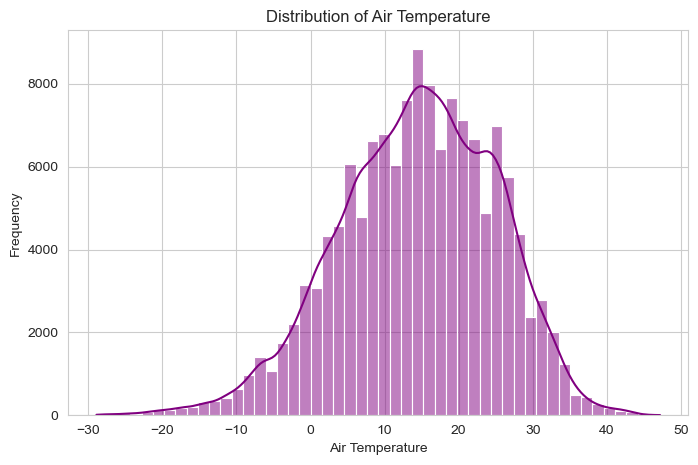

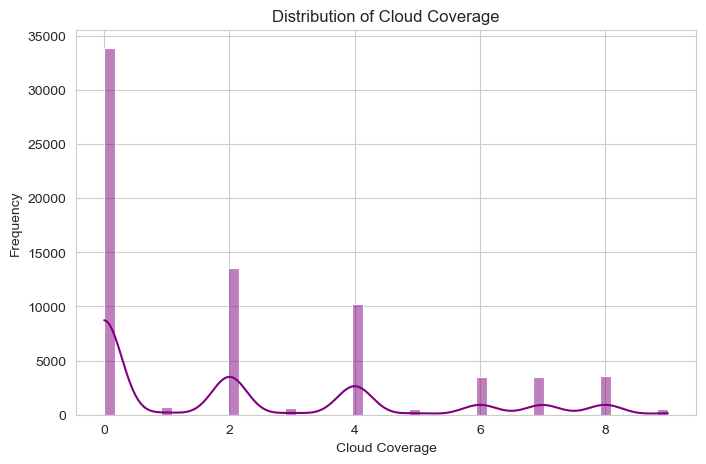

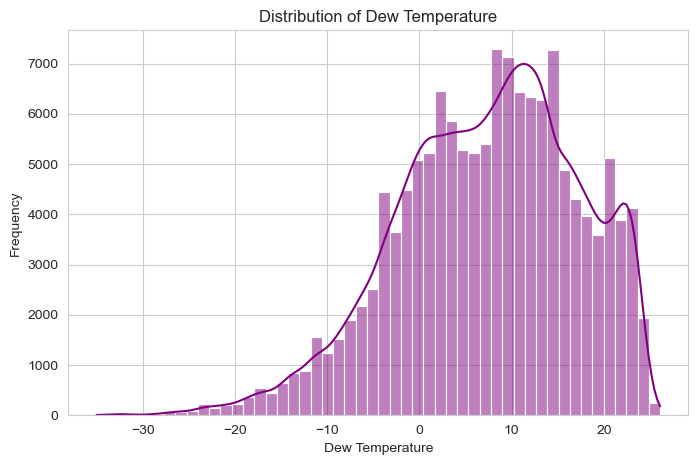

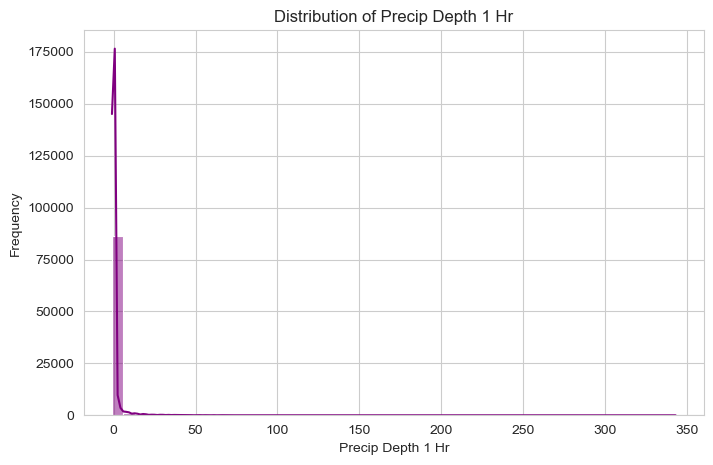

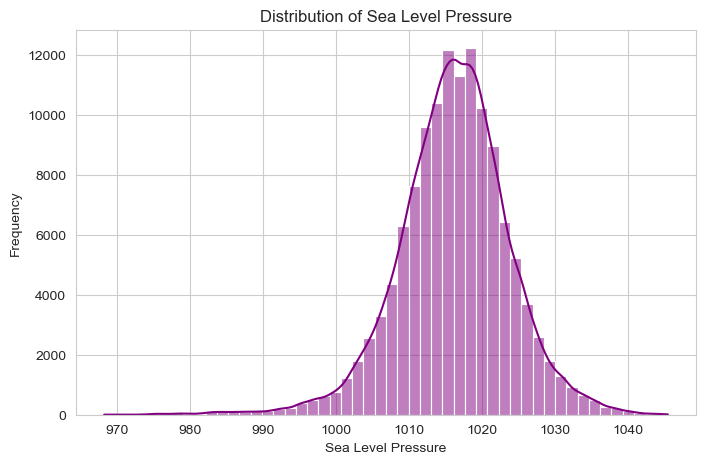

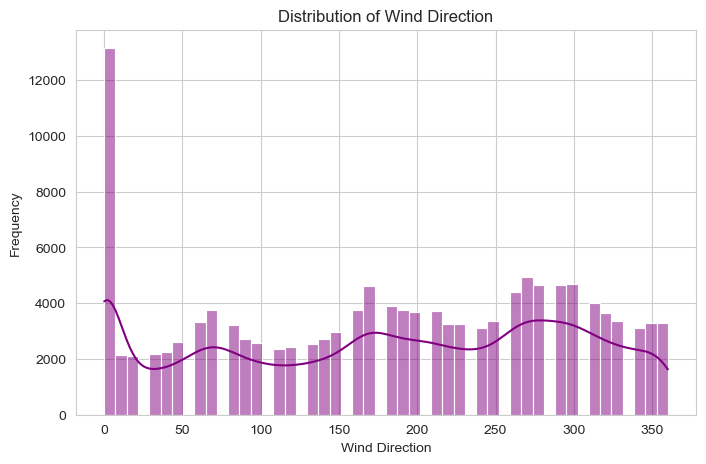

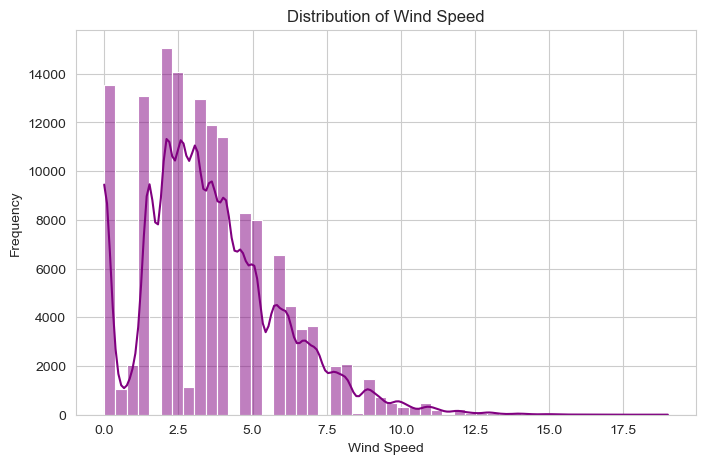

In [8]:
# 1. Number of unique buildings
num_unique_buildings = building_metadata["building_id"].nunique()
print(f"Number of Unique Buildings: {num_unique_buildings}")

# 2. Number of unique meters
# num_unique_meters = train_data["meter"].nunique()
# print(f"Number of Unique Meters: {num_unique_meters}")

# 3. Number of unique primary use of buildings
num_unique_primary_use = building_metadata["primary_use"].nunique()
print(f"Number of Unique Primary Use Categories: {num_unique_primary_use}")

# 4. Distribution of square footage of buildings
plt.figure(figsize=(12, 5))
sns.histplot(building_metadata["square_feet"].dropna(), bins=50, kde=True, color="blue")
plt.xlabel("Square Feet")
plt.ylabel("Frequency")
plt.title("Distribution of Building Square Footage")
plt.savefig("SquareFootage.png")
plt.show()

# 5. Distribution of year built of buildings
plt.figure(figsize=(12, 5))
sns.histplot(building_metadata["year_built"].dropna(), bins=50, kde=True, color="green")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.title("Distribution of Building Construction Year")
plt.savefig("ConstructionYear.png")
plt.show()

# 6. Correlation Heatmap for Weather Data (Dropping Non-Numeric Columns)
weather_train_numeric = weather_train.select_dtypes(include=[np.number])  # Keep only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(weather_train_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.savefig("CorrelationHeatmap.png")
plt.show()

# 7. Distribution plots for selected weather features
weather_features = ["air_temperature", "cloud_coverage", "dew_temperature", "precip_depth_1_hr",
                    "sea_level_pressure", "wind_direction", "wind_speed"]

for feature in weather_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(weather_train[feature].dropna(), bins=50, kde=True, color="purple")
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}")
    plt.savefig(f"Distribution_{feature}.png")
    plt.show()

# Preprocessing

### Merging the data, Droping features, and Creating New Features

In [9]:
def prepare_data(X, building_data, weather_data, test=False):
    """
    Preparing vfinal dataset with all features.
    """
    
    X = X.merge(building_data, on="building_id", how="left")
    X = X.merge(weather_data, on=["site_id", "timestamp"], how="left")
    
    X.timestamp = pd.to_datetime(X.timestamp, format="%Y-%m-%d %H:%M:%S")
    
    if not test:
        X.sort_values("timestamp", inplace=True)
        X.reset_index(drop=True, inplace=True)
        
    holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",
                "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-26",
                "2017-01-01", "2017-01-16", "2017-02-20", "2017-05-29", "2017-07-04",
                "2017-09-04", "2017-10-09", "2017-11-10", "2017-11-23", "2017-12-25",
                "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
                "2018-09-03", "2018-10-08", "2018-11-12", "2018-11-22", "2018-12-25",
                "2019-01-01"]
    
    X["hour"] = X.timestamp.dt.hour
    X["weekday"] = X.timestamp.dt.weekday
    X["is_holiday"] = (X.timestamp.dt.date.astype("str").isin(holidays)).astype(int)
    
    drop_features = ["timestamp", "wind_direction"]

    X.drop(drop_features, axis=1, inplace=True)

    if test:
        row_ids = X.row_id
        X.drop("row_id", axis=1, inplace=True)
        return X, row_ids
    else:
        y = np.log1p(X.meter_reading)
        X.drop("meter_reading", axis=1, inplace=True)
        return X, y

In [10]:
train_full, y_train_full = prepare_data(train_data, building_metadata, weather_train)

train_full = pd.get_dummies(train_full, columns=["primary_use"])
train_full = pd.get_dummies(train_full, columns=["meter_category"])

display(y_train_full)

0           0.000000
1           0.000000
2           4.965226
3           3.791459
4           8.081902
              ...   
20216095    1.246314
20216096    2.737771
20216097    3.899394
20216098    0.810930
20216099    1.348073
Name: meter_reading, Length: 20216100, dtype: float64

In [11]:
display(train_full)

,building_id,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,meter_category_ChilledWater,meter_category_Electricity,meter_category_HotWater,meter_category_Steam
0,0,0,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,1,0,0
1,1104,13,199722,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,...,0,0,0,0,0,0,1,0,0,0
2,1104,13,199722,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,...,0,0,0,0,0,0,0,1,0,0
3,1103,13,23903,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,...,0,0,0,0,0,0,0,1,0,0
4,1102,13,87187,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,604,4,8463,NaN,3.0,12.8,2.0,3.3,0.0,1013.6,...,0,0,0,0,0,0,0,1,0,0
20216096,605,4,51020,1924.0,5.0,12.8,2.0,3.3,0.0,1013.6,...,0,0,0,0,0,0,0,1,0,0
20216097,606,4,23432,1999.0,2.0,12.8,2.0,3.3,0.0,1013.6,...,0,0,0,0,1,0,0,1,0,0
20216098,590,4,8516,1920.0,2.0,12.8,2.0,3.3,0.0,1013.6,...,0,0,0,0,0,0,0,1,0,0


In [12]:
test_full, row_ids = prepare_data(test_data, building_metadata, weather_test, test=True)

test_full = pd.get_dummies(test_full, columns=["primary_use"])
test_full = pd.get_dummies(test_full, columns=["meter_category"])

display(test_full)

,building_id,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,meter_category_ChilledWater,meter_category_Electricity,meter_category_HotWater,meter_category_Steam
0,0,0,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,...,0,0,0,0,0,0,0,1,0,0
1,1,0,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,...,0,0,0,0,0,0,0,1,0,0
2,2,0,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,...,0,0,0,0,0,0,0,1,0,0
3,3,0,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,...,0,0,0,0,0,0,0,1,0,0
4,4,0,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41697595,1444,15,19619,1914.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
41697596,1445,15,4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
41697597,1446,15,11265,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
41697598,1447,15,29775,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


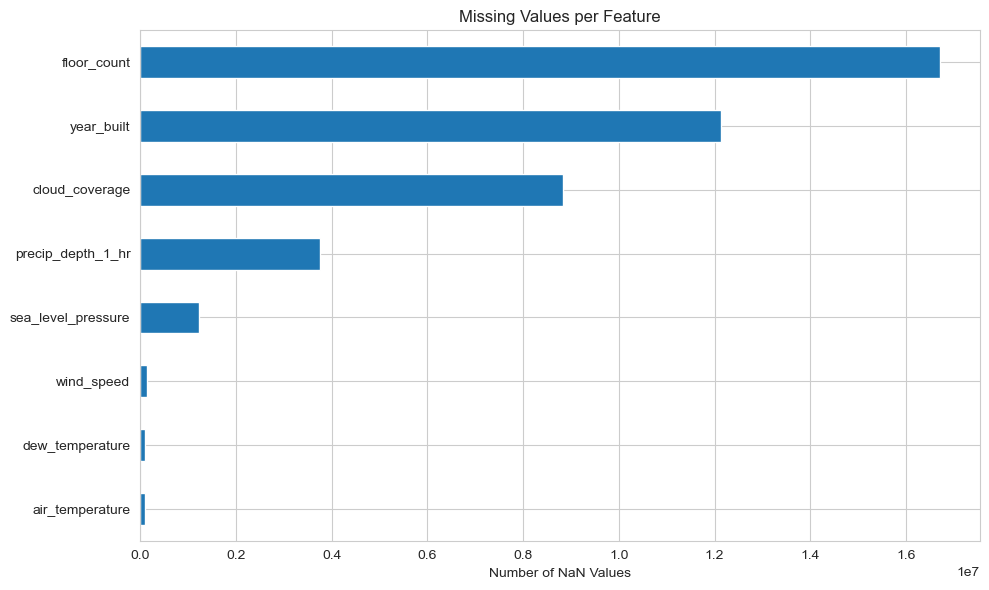

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_nan_counts(df):
    """
    Visualize the number of NaN values per feature in the DataFrame.
    """
    nan_counts = df.isna().sum()
    nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    nan_counts.plot(kind='barh')
    plt.xlabel("Number of NaN Values")
    plt.title("Missing Values per Feature")
    plt.tight_layout()
    plt.savefig("MissingValues.png")
    plt.show()

visualize_nan_counts(train_full)

## Missing Value Imputation, Normalization, and Feature Selection

In [14]:
from scipy.stats import zscore

def normalize_features(df):
    """
    Normalize selected features using Z-score normalization.
    """
    cols_to_normalize = ['square_feet', 'air_temperature', 'dew_temperature', 'wind_speed', 'sea_level_pressure']
    df[cols_to_normalize] = df[cols_to_normalize].apply(zscore)
    return df


def impute_missing_values(df):
    """
    Impute missing values:
    - Use mode for 'floor_count', 'year_built', 'cloud_coverage'.
    - Use mean for 'precip_depth_1_hr', 'sea_level_pressure'.
    - Leave other columns untouched.
    """
    # Impute with mode
    mode_cols = ['floor_count', 'year_built', 'cloud_coverage', 'precip_depth_1_hr']
    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    # Impute with mean
    mean_cols = ['sea_level_pressure', 'air_temperature', 'dew_temperature', 'wind_speed']
    for col in mean_cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            mean_val = df[col].mean(skipna=True)  # skipna=True is default
            df[col] = df[col].fillna(mean_val)

    return df


def remove_dew_temperature(df):
    """
    Remove the feature 'dew_temperature' since it has correlation with 'site_id'.
    """
    if "dew_temperature" in df.columns:
        df.drop(columns=["dew_temperature"], inplace=True)
    return df


# Apply preprocessing functions to train and test datasets
train_full = impute_missing_values(train_full)
train_full = normalize_features(train_full)
train_full = remove_dew_temperature(train_full)

test_full = impute_missing_values(test_full)
test_full = normalize_features(test_full)
test_full = remove_dew_temperature(test_full)

In [15]:
display(train_full)

,building_id,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed,...,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage,meter_category_ChilledWater,meter_category_Electricity,meter_category_HotWater,meter_category_Steam
0,0,0,-0.856658,2008.0,1.0,0.825197,6.0,0.0,0.528277,-1.496050,...,0,0,0,0,0,0,0,1,0,0
1,1104,13,0.784848,1976.0,1.0,-2.223949,8.0,0.0,1.054433,0.320015,...,0,0,0,0,0,0,1,0,0,0
2,1104,13,0.784848,1976.0,1.0,-2.223949,8.0,0.0,1.054433,0.320015,...,0,0,0,0,0,0,0,1,0,0
3,1103,13,-0.716051,1976.0,1.0,-2.223949,8.0,0.0,1.054433,0.320015,...,0,0,0,0,0,0,0,1,0,0
4,1102,13,-0.175820,1976.0,1.0,-2.223949,8.0,0.0,1.054433,0.320015,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,604,4,-0.847857,1976.0,3.0,-0.291908,2.0,0.0,-0.363265,-0.565870,...,0,0,0,0,0,0,0,1,0,0
20216096,605,4,-0.484564,1924.0,5.0,-0.291908,2.0,0.0,-0.363265,-0.565870,...,0,0,0,0,0,0,0,1,0,0
20216097,606,4,-0.720072,1999.0,2.0,-0.291908,2.0,0.0,-0.363265,-0.565870,...,0,0,0,0,1,0,0,1,0,0
20216098,590,4,-0.847404,1920.0,2.0,-0.291908,2.0,0.0,-0.363265,-0.565870,...,0,0,0,0,0,0,0,1,0,0


# Train and Validation Split

In [16]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    train_full, y_train_full, test_size=0.2, random_state=42
)

# Supervised Training

## 1. Dummy Regression

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assume X_train and y_train are already defined
# Compute the mean meter reading from training set
mean_meter_reading = y_train.mean()

# Create dummy predictions for the test set
y_pred_dummy = np.full_like(y_test, fill_value=mean_meter_reading, dtype=np.float64)

# Calculate metrics
msle = np.mean((np.log1p(y_pred_dummy) - y_test) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_dummy) - y_test))

# Print metrics
print(f"RMSLE: {rmsle:.4f}")
print(f"MSLE:  {msle:.4f}")
print(f"MALE:  {male:.4f}")

RMSLE: 3.3007
MSLE:  10.8945
MALE:  2.8839


In [18]:
num_rows = len(test_full)  # Get the number of rows in test_full
mean_meter_reading = y_train_full.mean()  # Compute the mean meter reading

# Create the submission DataFrame
submission_df = pd.DataFrame({
    "row_id": range(num_rows),  # Sequential row IDs
    "meter_reading": mean_meter_reading  # Fill with mean meter reading
})

# Save to CSV file
submission_df.to_csv("submission_dummy.csv", index=False)

print("CSV file 'submission_dummy.csv' created successfully!")

CSV file 'submission_dummy.csv' created successfully!


# 2. Simple Linear Regression

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert DataFrames to NumPy arrays
x_train_np = X_train
y_train_np = y_train
x_test_np = X_test
y_test_np = y_test
test_full_np = test_full

# Initialize weights and bias
m = np.zeros(x_train_np.shape[1])
c = 0

# Hyperparameters
L = 0.001         # Learning rate
epochs = 30      # Number of iterations
n = float(len(y_train_np))  # Number of samples in training set

# Gradient Descent
for i in range(epochs): 
    Y_pred = np.dot(x_train_np, m) + c
    D_m = (-2/n) * np.dot(x_train_np.T, (y_train_np - Y_pred))
    D_c = (-2/n) * np.sum(y_train_np - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

print("Learned weights:", m)
print("Learned bias:", c)

# Predict on test set
y_pred_test = np.dot(x_test_np, m) + c

# Calculate logarithmic error metrics
# Clip negative values to avoid invalid log1p
y_pred_test = np.clip(y_pred_test, a_min=0, a_max=None)
y_test_np = np.clip(y_test_np, a_min=0, a_max=None)

y_pred_test = np.expm1(y_pred_test)

# Calculate logarithmic error metrics
msle = np.mean((np.log1p(y_pred_test) - y_test_np) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_test) - y_test_np))

# Print metrics
print(f"Test MSLE:  {msle:.4f}")
print(f"Test RMSLE: {rmsle:.4f}")
print(f"Test MALE:  {male:.4f}")

# Predict on full test data and revert log scale
y_pred_submission = np.dot(test_full_np, m) + c
y_pred_submission = np.expm1(y_pred_submission)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})

# Save submission to CSV
submission_df.to_csv("submission_simpleLinear.csv", index=False)
print("CSV file 'submission_simpleLinear.csv' created successfully!")

Learned weights: [-4.69124610e+115 -4.72359388e+113 -4.26756555e+110 -1.11205208e+116
 -8.59690555e+112  1.33081512e+111 -5.90543640e+112 -3.70036358e+112
 -3.29232791e+110  4.59329030e+108 -6.48333657e+113 -1.69485093e+113
 -1.54748894e+111 -2.25218767e+112 -6.30355167e+111 -3.22049281e+110
 -1.17239310e+111 -5.97786657e+111 -3.70338828e+110 -1.25494771e+112
 -6.66017819e+110 -5.79150226e+110 -4.55015995e+111 -9.07867873e+109
 -2.88430897e+110 -2.81235013e+110 -2.23870952e+110 -1.60377498e+110
 -3.07478061e+110 -1.18537939e+112 -3.30471590e+112 -3.48610075e+111
 -7.97800691e+111]
Learned bias: -5.636506051238711e+112
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
CSV file 'submission_simpleLinear.csv' created successfully!


# 3. Lasso Regression

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Train Lasso regression with SGD on training set
lasso_sgd = SGDRegressor(
    penalty="l1", 
    alpha=0.001, 
    eta0=0.01, 
    learning_rate="constant", 
    max_iter=30,
    random_state=42
)
lasso_sgd.fit(x_train_np, y_train_np)

print("Coefficients:", lasso_sgd.coef_)
print("Intercept:", lasso_sgd.intercept_)

# Predict on test set
y_pred_test = lasso_sgd.predict(x_test_np)

# Clip negative values to 0 before applying log1p
y_pred_test_clipped = np.clip(y_pred_test, a_min=0, a_max=None)
y_pred_test_clipped = np.expm1(y_pred_test_clipped)

# Calculate logarithmic error metrics
msle = np.mean((np.log1p(y_pred_test_clipped) - y_test_np) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_test_clipped) - y_test_np))

# Print metrics
print(f"Test MSLE:  {msle:.4f}")
print(f"Test RMSLE: {rmsle:.4f}")
print(f"Test MALE:  {male:.4f}")

# Predict on test_full and revert log scale
y_pred_submission = lasso_sgd.predict(test_full_np)
y_pred_submission = np.expm1(y_pred_submission)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})

# Save to CSV file
submission_df.to_csv("submission_lasso.csv", index=False)
print("CSV file 'submission_lasso.csv' created successfully!")

Coefficients: [-1.74967108e+13 -2.31345727e+13  8.73901353e+12 -8.57444386e+12
  1.42131444e+13  5.66506998e+12 -5.37491064e+12 -8.88189047e+12
 -1.13310680e+13 -1.74823917e+12  1.20443575e+13  1.55327609e+13
  7.12996615e+12  2.31616811e+13  2.60009382e+13 -2.73090537e+12
 -1.63189383e+12 -5.93843390e+11 -8.58481118e+12 -1.38892710e+13
  4.33607530e+12  1.04907661e+13 -2.37102059e+13 -1.38991963e+12
 -1.12791093e+13 -8.08951331e+12 -2.53011953e+11  7.63400106e+12
  1.22914437e+12  6.49693462e+10 -1.49497988e+13  1.40295324e+13
  1.55541830e+12]
Intercept: [7.00121252e+11]
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
CSV file 'submission_lasso.csv' created successfully!


# 4. Ridge Regression

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Train Ridge regression with SGD
ridge_sgd = SGDRegressor(
    penalty="l2", 
    alpha=0.001, 
    learning_rate="constant", 
    eta0=0.01, 
    max_iter=30,
    random_state=42
)
ridge_sgd.fit(x_train_np, y_train_np)

print("Coefficients:", ridge_sgd.coef_)
print("Intercept:", ridge_sgd.intercept_)

y_pred_test = ridge_sgd.predict(x_test_np)

# Ensure no negative values before log1p
y_pred_test_clipped = np.clip(y_pred_test, a_min=0, a_max=None)
y_test_np_clipped = np.clip(y_test_np, a_min=0, a_max=None)

y_pred_test_clipped = np.expm1(y_pred_test_clipped)

# Calculate logarithmic error metrics safely
msle = np.mean((np.log1p(y_pred_test_clipped) - y_test_np) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_test_clipped) - y_test))

# Print metrics
print(f"Test MSLE:  {msle:.4f}")
print(f"Test RMSLE: {rmsle:.4f}")
print(f"Test MALE:  {male:.4f}")

# Predict on full test set and convert back from log scale
y_pred_submission = np.expm1(ridge_sgd.predict(test_full_np))

# Create submission DataFrame
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})

# Save to CSV
submission_df.to_csv("submission_ridge.csv", index=False)
print("CSV file 'submission_ridge.csv' created successfully!")

Coefficients: [-1.23023908e+13  2.47675492e+11 -2.14492321e+11 -1.02962626e+13
  5.31304203e+12 -2.87863951e+12  4.25134204e+12 -1.29747580e+12
 -9.54193494e+11  9.09750119e+11 -9.40571041e+11  9.54363558e+12
 -2.71500801e+11 -6.05376577e+11 -1.30068588e+12 -1.36307623e+11
 -8.61490410e+10  6.04549418e+11 -2.53179530e+11  1.54284398e+12
 -3.05580794e+11  1.98439243e+11  3.97917354e+11 -2.06269068e+10
  6.39590738e+10 -1.45629819e+11  4.39045610e+10  1.48685748e+10
 -3.36388750e+10  5.20211685e+09  5.73348704e+11 -1.13349662e+11
 -4.85894003e+11]
Intercept: [-6.74385366e+11]
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
CSV file 'submission_ridge.csv' created successfully!


# 5. Testing Lasso regression model with different learning rate and number of iterations

/Users/samskanderi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Learning rate: 0.001, Iterations: 10
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------
Learning rate: 0.001, Iterations: 30
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/1391797418.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.001, Iterations: 50
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------
Learning rate: 0.001, Iterations: 100
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------
Learning rate: 0.01, Iterations: 10
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------
Learning rate: 0.01, Iterations: 30
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/1391797418.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.01, Iterations: 50
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/1391797418.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.01, Iterations: 100
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------
Learning rate: 0.1, Iterations: 10
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/1391797418.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.1, Iterations: 30
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------
Learning rate: 0.1, Iterations: 50
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------
Learning rate: 0.1, Iterations: 100
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


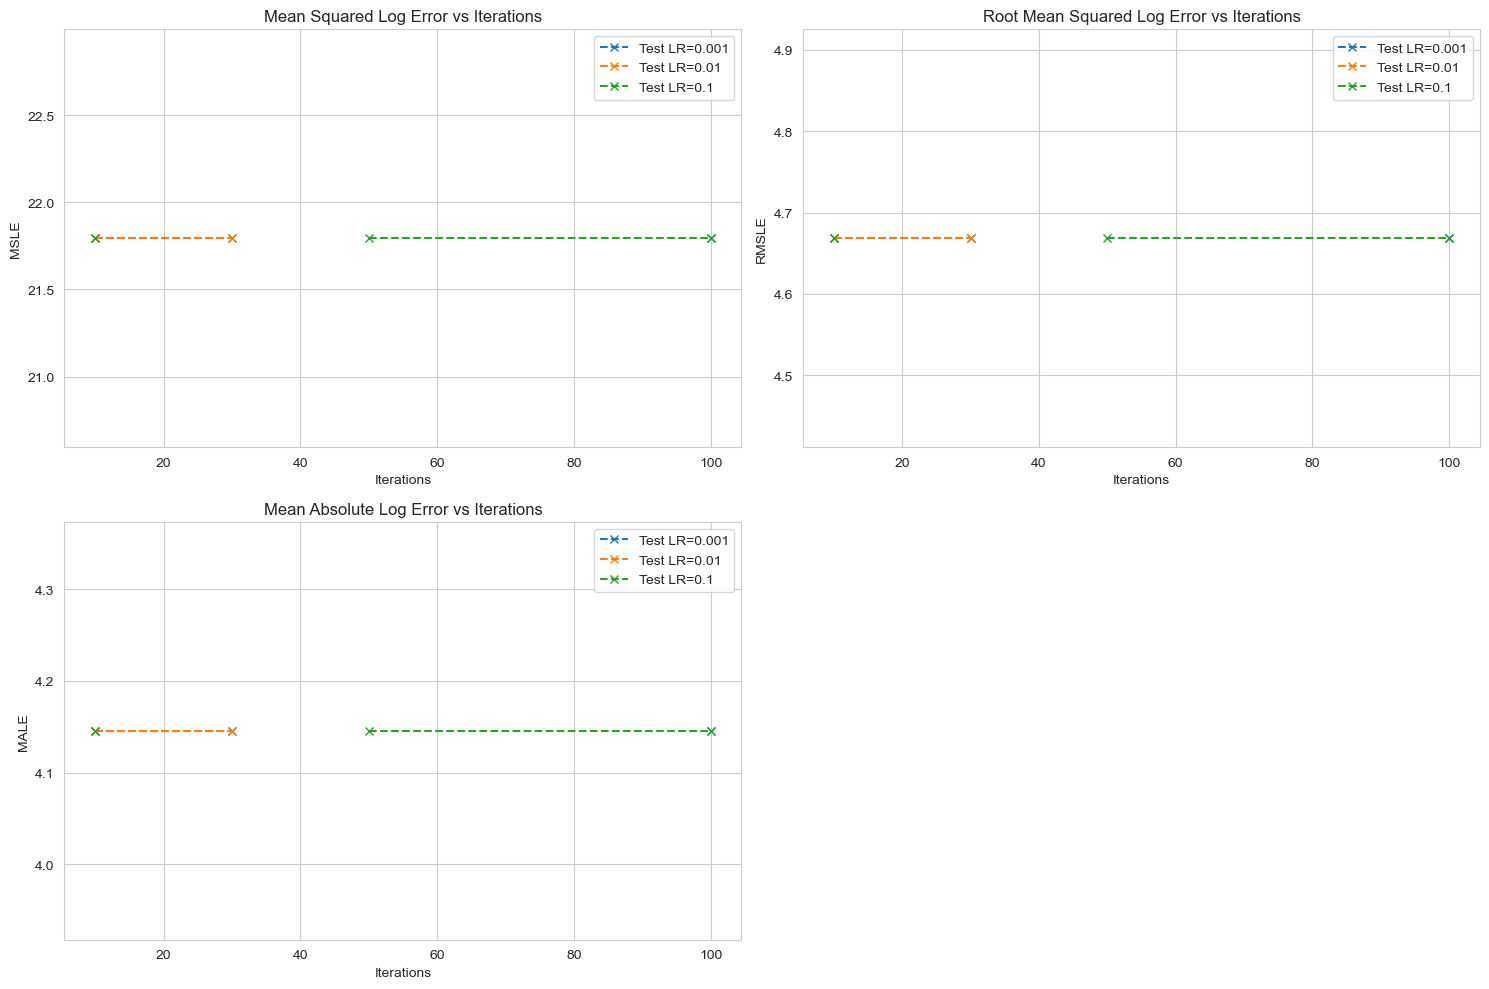

Best model - Learning Rate: 0.001, Iterations: 10.0
Test RMSLE: 4.6683


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# Define hyperparameters to test
learning_rates = [0.001, 0.01, 0.1]
max_iterations = [10, 30, 50, 100]

# To store results
results = []

# Train and evaluate models with different hyperparameters
for lr in learning_rates:
    for iters in max_iterations:
        # Train Lasso model
        lasso = SGDRegressor(penalty="l1", alpha=0.001, eta0=lr, learning_rate="constant", max_iter=iters)
        lasso.fit(X_train, y_train)
        
        # Make predictions
        y_test_pred = lasso.predict(X_test)
        
        # Clip negative predictions to avoid log1p errors
        y_test = np.clip(y_test, a_min=0, a_max=None)
        y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)
        
        y_test_pred = np.expm1(y_test_pred)

        # Calculate logarithmic loss metrics
        test_msle = np.mean((np.log1p(y_test_pred) - y_test) ** 2)
        test_rmsle = np.sqrt(test_msle)
        test_male = np.mean(np.abs(np.log1p(y_test_pred) - y_test))
        
        # Store results
        results.append({
            'learning_rate': lr,
            'iterations': iters,
            'test_mse': test_msle,
            'test_rmse': test_rmsle,
            'test_mae': test_male
        })
        
        print(f"Learning rate: {lr}, Iterations: {iters}")

        # Print metrics
        print(f"Test MSLE:  {test_msle:.4f}")
        print(f"Test RMSLE: {test_rmsle:.4f}")
        print(f"Test MALE:  {test_male:.4f}")

        print("-" * 50)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(15, 10))

# Plot MSE for different learning rates and iterations
plt.subplot(2, 2, 1)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_mse'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('MSLE')
plt.title('Mean Squared Log Error vs Iterations')
plt.legend()

# Plot RMSE for different learning rates and iterations
plt.subplot(2, 2, 2)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_rmse'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('RMSLE')
plt.title('Root Mean Squared Log Error vs Iterations')
plt.legend()

# Plot MAE for different learning rates and iterations
plt.subplot(2, 2, 3)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_mae'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('MALE')
plt.title('Mean Absolute Log Error vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Find the best model based on test RMSE
best_model_idx = results_df['test_rmse'].idxmin()
best_model = results_df.iloc[best_model_idx]
print(f"Best model - Learning Rate: {best_model['learning_rate']}, Iterations: {best_model['iterations']}")
print(f"Test RMSLE: {best_model['test_rmse']:.4f}")



In [27]:
best_lasso = SGDRegressor(
    penalty="l1", 
    alpha=0.001, 
    eta0=best_model['learning_rate'], 
    learning_rate="constant", 
    max_iter=int(best_model['iterations'])
)
best_lasso.fit(train_full, y_train_full)

# Predict on test data
Y_pred_test = best_lasso.predict(test_full)

# Converting predictions back from log scale
Y_pred_test = np.expm1(Y_pred_test)

# Create submission file
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": Y_pred_test
})

# Save to CSV file
submission_df.to_csv("submission_best_lasso.csv", index=False)
print("CSV file 'submission_best_lasso.csv' created successfully!")

/Users/samskanderi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/1538877419.py:14: RuntimeWarning: overflow encountered in expm1
  Y_pred_test = np.expm1(Y_pred_test)


CSV file 'submission_best_lasso.csv' created successfully!


# 6. Testing Ridge regression model with different learning rate and number of iterations

/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.001, Iterations: 10
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.001, Iterations: 30
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.001, Iterations: 50
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------
Learning rate: 0.001, Iterations: 100
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/Users/samskanderi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Learning rate: 0.01, Iterations: 10
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.01, Iterations: 30
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.01, Iterations: 50
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.01, Iterations: 100
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


/Users/samskanderi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Learning rate: 0.1, Iterations: 10
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.1, Iterations: 30
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------
Learning rate: 0.1, Iterations: 50
Test MSLE:  21.7931
Test RMSLE: 4.6683
Test MALE:  4.1455
--------------------------------------------------


/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_37844/2358093021.py:31: RuntimeWarning: overflow encountered in expm1
  y_test_pred = np.expm1(y_test_pred)


Learning rate: 0.1, Iterations: 100
Test MSLE:  inf
Test RMSLE: inf
Test MALE:  inf
--------------------------------------------------


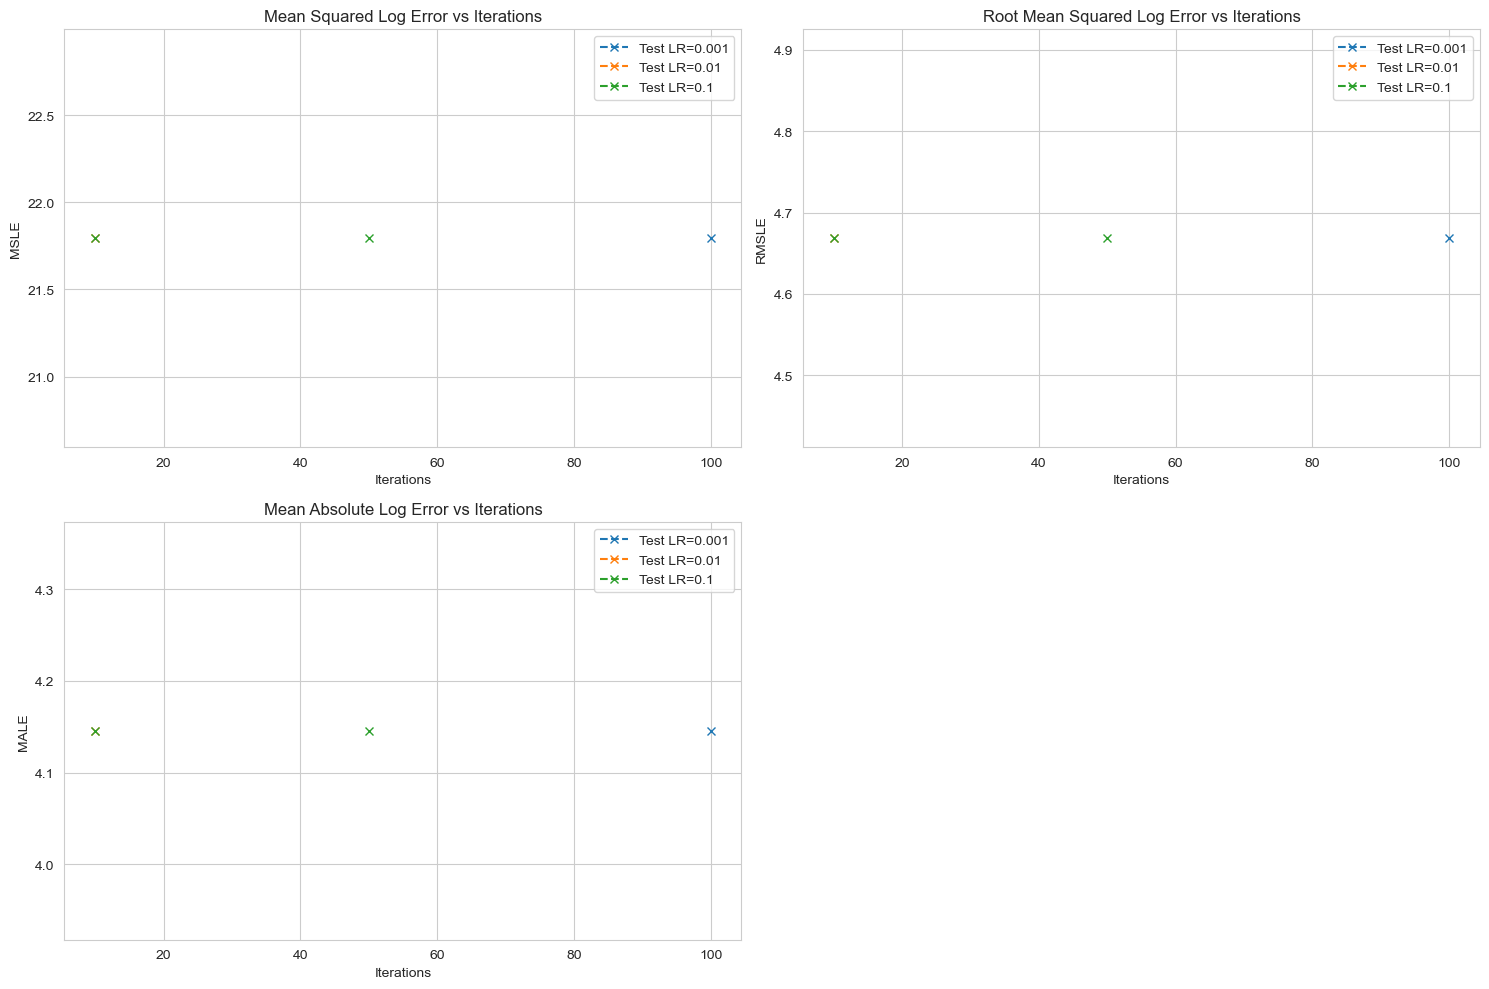

Best model - Learning Rate: 0.001, Iterations: 100.0
Test RMSLE: 4.6683


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Define hyperparameters to test
learning_rates = [0.001, 0.01, 0.1]
max_iterations = [10, 30, 50, 100]

# To store results
results = []

# Train and evaluate models with different hyperparameters
for lr in learning_rates:
    for iters in max_iterations:
        # Train ridge_sgd model
        ridge_sgd = SGDRegressor(penalty="l2", alpha=0.001, learning_rate="constant", eta0=lr, max_iter=iters)
        ridge_sgd.fit(X_train, y_train)
        
        # Make predictions
        y_test_pred = ridge_sgd.predict(X_test)
        
        
        # Clip negative predictions to avoid log1p errors
        y_test = np.clip(y_test, a_min=0, a_max=None)
        y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)
        
        y_test_pred = np.expm1(y_test_pred)

        # Calculate logarithmic loss metrics
        test_msle = np.mean((np.log1p(y_test_pred) - y_test) ** 2)
        test_rmsle = np.sqrt(test_msle)
        test_male = np.mean(np.abs(np.log1p(y_test_pred) - y_test))
        
        # Store results
        results.append({
            'learning_rate': lr,
            'iterations': iters,
            'test_mse': test_msle,
            'test_rmse': test_rmsle,
            'test_mae': test_male
        })
        
        print(f"Learning rate: {lr}, Iterations: {iters}")

        # Print metrics
        print(f"Test MSLE:  {test_msle:.4f}")
        print(f"Test RMSLE: {test_rmsle:.4f}")
        print(f"Test MALE:  {test_male:.4f}")
        
        print("-" * 50)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(15, 10))

# Plot MSE for different learning rates and iterations
plt.subplot(2, 2, 1)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_mse'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('MSLE')
plt.title('Mean Squared Log Error vs Iterations')
plt.legend()

# Plot RMSE for different learning rates and iterations
plt.subplot(2, 2, 2)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_rmse'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('RMSLE')
plt.title('Root Mean Squared Log Error vs Iterations')
plt.legend()

# Plot MAE for different learning rates and iterations
plt.subplot(2, 2, 3)
for lr in learning_rates:
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['iterations'], subset['test_mae'], marker='x', linestyle='--', label=f'Test LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('MALE')
plt.title('Mean Absolute Log Error vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Find the best model based on test RMSE
best_model_idx = results_df['test_rmse'].idxmin()
best_model = results_df.iloc[best_model_idx]
print(f"Best model - Learning Rate: {best_model['learning_rate']}, Iterations: {best_model['iterations']}")
print(f"Test RMSLE: {best_model['test_rmse']:.4f}")



In [29]:
best_Ridge = SGDRegressor(
    penalty="l1", 
    alpha=0.001, 
    eta0=best_model['learning_rate'], 
    learning_rate="constant", 
    max_iter=int(best_model['iterations'])
)
best_Ridge.fit(train_full, y_train_full)

# Predict on test data
Y_pred_test = best_Ridge.predict(test_full)

# Converting predictions back from log scale
Y_pred_test = np.nan_to_num(Y_pred_test, nan=0.0, posinf=0.0)
Y_pred_test = np.expm1(Y_pred_test)



# Create submission file
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": Y_pred_test
})

# Save to CSV file
submission_df.to_csv("submission_best_ridge.csv", index=False)
print("CSV file 'submission_best_Ridge.csv' created successfully!")

CSV file 'submission_best_Ridge.csv' created successfully!


# 7. LightGBM Model (Split Half-and-Half)

In [9]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd


path_data = ""

train_data = pd.read_csv(path_data + 'train.csv')
test_data = pd.read_csv(path_data + 'test.csv')
building_metadata = pd.read_csv(path_data + 'building_metadata.csv')
weather_train = pd.read_csv(path_data + 'weather_train.csv')
weather_test = pd.read_csv(path_data + 'weather_test.csv')
sample_submission = pd.read_csv(path_data + 'sample_submission.csv')

In [33]:
train_full, y_train_full = prepare_data(train_data, building_metadata, weather_train)
test_full, row_ids = prepare_data(test_data, building_metadata, weather_test, test=True)


from scipy.stats import zscore

def normalize_features(df):
    """
    Normalize selected features using Z-score normalization.
    """
    cols_to_normalize = ['square_feet', 'air_temperature', 'dew_temperature', 'wind_speed', 'sea_level_pressure']
    df[cols_to_normalize] = df[cols_to_normalize].apply(zscore)
    return df


def impute_missing_values(df):
    """
    Impute missing values:
    - Use mode for 'floor_count', 'year_built', 'cloud_coverage'.
    - Use mean for 'precip_depth_1_hr', 'sea_level_pressure'.
    - Leave other columns untouched.
    """
    # Impute with mode
    mode_cols = ['floor_count', 'year_built', 'cloud_coverage', 'precip_depth_1_hr']
    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    # Impute with mean
    mean_cols = ['sea_level_pressure', 'air_temperature', 'dew_temperature', 'wind_speed']
    for col in mean_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    return df


def remove_dew_temperature(df):
    """
    Remove the feature 'dew_temperature' since it has correlation with 'site_id'.
    """
    if "dew_temperature" in df.columns:
        df.drop(columns=["dew_temperature"], inplace=True)
    return df


# Apply preprocessing functions to train and test datasets
train_full = impute_missing_values(train_full)
train_full = normalize_features(train_full)
train_full = remove_dew_temperature(train_full)

test_full = impute_missing_values(test_full)
test_full = normalize_features(test_full)
test_full = remove_dew_temperature(test_full)

display(y_train_full)

0           0.000000
1           0.000000
2           4.965226
3           3.791459
4           8.081902
              ...   
20216095    1.246314
20216096    2.737771
20216097    3.899394
20216098    0.810930
20216099    1.348073
Name: meter_reading, Length: 20216100, dtype: float64

In [4]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------- CATEGORICAL FIX ----------------------
for df in [train_full, test_full]:
    if 'primary_use' in df.columns:
        df['primary_use'] = df['primary_use'].astype('category')

# ---------------------- SPLIT INTO HALVES ----------------------
X_half_1 = train_full[:len(train_full) // 2]
X_half_2 = train_full[len(train_full) // 2:]
y_half_1 = y_train_full[:len(y_train_full) // 2]
y_half_2 = y_train_full[len(y_train_full) // 2:]

# ---------------------- CATEGORICAL FEATURES ----------------------
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday"]

# ---------------------- LIGHTGBM DATASETS ----------------------
d_half_1 = lgb.Dataset(X_half_1, label=y_half_1, categorical_feature=categorical_features, free_raw_data=False)
d_half_2 = lgb.Dataset(X_half_2, label=y_half_2, categorical_feature=categorical_features, free_raw_data=False)

# ---------------------- PARAMETERS ----------------------
params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse",
    "verbose": -1
}

# ---------------------- TRAIN FIRST MODEL ----------------------
# TRAIN FIRST MODEL
model_half_1 = lgb.train(
    params,
    train_set=d_half_1,
    num_boost_round=1000,
    valid_sets=[d_half_1, d_half_2],
    callbacks=[lgb.early_stopping(stopping_rounds=200)]
)

# TRAIN SECOND MODEL
model_half_2 = lgb.train(
    params,
    train_set=d_half_2,
    num_boost_round=1000,
    valid_sets=[d_half_2, d_half_1],
    callbacks=[lgb.early_stopping(stopping_rounds=200)]
)

# ---------------------- PREDICT ON SECOND HALF (EVAL) ----------------------
y_pred_eval_1 = model_half_1.predict(X_half_2)
y_pred_eval_2 = model_half_2.predict(X_half_1)
y_pred_eval_avg = np.concatenate([
    y_pred_eval_1,  # model 1 on second half
    y_pred_eval_2   # model 2 on first half
])

# Actual target values
y_eval_true = np.concatenate([y_half_2, y_half_1])

# Convert back from log scale if needed
y_pred_eval_final = y_pred_eval_avg
y_eval_true_final = y_eval_true


# ---------------------- METRICS ----------------------
# Clip negative values to avoid invalid log1p
y_pred_eval_final = np.clip(y_pred_eval_final, a_min=0, a_max=None)

y_pred_eval_final = np.expm1(y_pred_eval_final)

# Calculate logarithmic error metrics
msle = np.mean((np.log1p(y_pred_eval_final) - y_eval_true_final) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_eval_final) - y_eval_true_final))

# Print metrics
print(f"\nValidation MSLE:  {msle:.4f}")
print(f"Validation RMSLE: {rmsle:.4f}")
print(f"Validation MALE:  {male:.4f}")

# ---------------------- PREDICT ON TEST_FULL ----------------------
y_pred_submission_1 = model_half_1.predict(test_full)
y_pred_submission_2 = model_half_2.predict(test_full)
y_pred_submission = (y_pred_submission_1 + y_pred_submission_2) / 2
y_pred_submission = np.clip(y_pred_submission, a_min=0, a_max=None)
y_pred_submission = np.expm1(y_pred_submission)

# ---------------------- SAVE SUBMISSION FILE ----------------------
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})
submission_df.to_csv("submission_lgbm_ensemble.csv", index=False)
print("\nCSV file 'submission_lgbm_ensemble.csv' created successfully!")

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[505]	training's rmse: 0.864138	valid_1's rmse: 1.37065
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[900]	training's rmse: 0.817021	valid_1's rmse: 1.50132

Validation MSLE:  2.0618
Validation RMSLE: 1.4359
Validation MALE:  0.7295

CSV file 'submission_lgbm_ensemble.csv' created successfully!


# 8. XGBoost

In [17]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# ---------------------- ENCODE CATEGORICALS ----------------------
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday"]

# Label encode object/categorical features
for col in categorical_features:
    if train_full[col].dtype == "object" or str(train_full[col].dtype) == "category":
        le = LabelEncoder()
        full_col = pd.concat([train_full[col], test_full[col]], axis=0)
        le.fit(full_col)
        train_full[col] = le.transform(train_full[col])
        test_full[col] = le.transform(test_full[col])

# ---------------------- SPLIT TRAINING SET ----------------------
X_half_1 = train_full[:len(train_full) // 2]
X_half_2 = train_full[len(train_full) // 2:]
y_half_1 = y_train_full[:len(y_train_full) // 2]
y_half_2 = y_train_full[len(y_train_full) // 2:]

# ---------------------- PREPARE DMatrix ----------------------
dtrain_1 = xgb.DMatrix(X_half_1, label=y_half_1)
dvalid_1 = xgb.DMatrix(X_half_2, label=y_half_2)

dtrain_2 = xgb.DMatrix(X_half_2, label=y_half_2)
dvalid_2 = xgb.DMatrix(X_half_1, label=y_half_1)

dtest = xgb.DMatrix(test_full)

# ---------------------- PARAMETERS ----------------------
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.05,
    "max_depth": 6,
    "lambda": 2,
    "subsample": 0.85,
    "colsample_bytree": 0.85
}

# ---------------------- TRAIN FIRST MODEL ----------------------
print("Training first model...")
model_1 = xgb.train(
    params,
    dtrain=dtrain_1,
    num_boost_round=1000,
    evals=[(dtrain_1, "train"), (dvalid_1, "valid")],
    early_stopping_rounds=200,
    verbose_eval=200
)

# ---------------------- TRAIN SECOND MODEL ----------------------
print("\nTraining second model...")
model_2 = xgb.train(
    params,
    dtrain=dtrain_2,
    num_boost_round=1000,
    evals=[(dtrain_2, "train"), (dvalid_2, "valid")],
    early_stopping_rounds=200,
    verbose_eval=200
)

# ---------------------- EVALUATE ----------------------
y_pred_1 = model_1.predict(dvalid_1)
y_pred_2 = model_2.predict(dvalid_2)
y_pred_eval = np.concatenate([y_pred_1, y_pred_2])
y_eval_true = np.concatenate([y_half_2, y_half_1])

# Convert back from log scale if needed
y_pred_eval_final = y_pred_eval
y_eval_true_final = y_eval_true

# Clip negative values to avoid invalid log1p
y_eval_true_final = np.clip(y_eval_true_final, a_min=0, a_max=None)
y_pred_eval_final = np.clip(y_pred_eval_final, a_min=0, a_max=None)

y_pred_eval_final = np.expm1(y_pred_eval_final)

# Calculate logarithmic error metrics
msle = np.mean((np.log1p(y_pred_eval_final) - y_eval_true_final) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_pred_eval_final) - y_eval_true_final))

# Print metrics
print(f"\nValidation MSLE:  {msle:.4f}")
print(f"Validation RMSLE: {rmsle:.4f}")
print(f"Validation MALE:  {male:.4f}")

# ---------------------- PREDICT ON TEST SET ----------------------
y_pred_test_1 = model_1.predict(dtest)
y_pred_test_2 = model_2.predict(dtest)
y_pred_submission = (y_pred_test_1 + y_pred_test_2) / 2
y_pred_submission = np.expm1(y_pred_submission)

# ---------------------- SUBMISSION ----------------------
submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})
submission_df.to_csv("submission_xgboost_ensemble.csv", index=False)
print("\nCSV file 'submission_xgboost_ensemble.csv' created successfully!")

Training first model...
[0]	train-rmse:207553.95601	valid-rmse:35787.34175
[199]	train-rmse:104639.12378	valid-rmse:189598.50644

Training second model...
[0]	train-rmse:35120.96771	valid-rmse:213837.17285
[200]	train-rmse:29523.84228	valid-rmse:211935.77151
[400]	train-rmse:28134.29437	valid-rmse:211737.33089
[600]	train-rmse:27143.80705	valid-rmse:211670.00732
[800]	train-rmse:26517.78994	valid-rmse:211620.56634
[999]	train-rmse:26034.15674	valid-rmse:211562.40175

Validation MSLE:  6.1041
Validation RMSLE: 2.4706
Validation MALE:  1.6720

CSV file 'submission_xgboost_ensemble.csv' created successfully!


# 9. MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# ---------------------- Encode Categorical Features ----------------------
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday"]

for col in categorical_features:
    if train_full[col].dtype == "object" or str(train_full[col].dtype) == "category":
        le = LabelEncoder()
        full_col = pd.concat([train_full[col], test_full[col]], axis=0)
        le.fit(full_col)
        train_full[col] = le.transform(train_full[col])
        test_full[col] = le.transform(test_full[col])

# ---------------------- Normalize All Features ----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_full)
test_scaled = scaler.transform(test_full)

# ---------------------- Split Training Set for Validation ----------------------
X_half_1 = X_scaled[:len(X_scaled) // 2]
X_half_2 = X_scaled[len(X_scaled) // 2:]
y_half_1 = y_train_full[:len(y_train_full) // 2]
y_half_2 = y_train_full[len(y_train_full) // 2:]

# ---------------------- Initialize and Train MLPRegressor ----------------------
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    learning_rate_init=0.01,
    max_iter=10,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42,
    verbose=True
)

mlp.fit(X_half_1, y_half_1)

# ---------------------- Evaluate on Validation Set ----------------------
y_val_pred = mlp.predict(X_half_2)
y_val_true = y_half_2

# Clip negative values to avoid invalid log1p
y_val_true = np.clip(y_val_true, a_min=0, a_max=None)
y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)

y_val_pred = np.expm1(y_val_pred)

# Calculate logarithmic error metrics
msle = np.mean((np.log1p(y_val_pred) - y_val_true) ** 2)
rmsle = np.sqrt(msle)
male = np.mean(np.abs(np.log1p(y_val_pred) - y_val_true))

# Print metrics
print(f"\nValidation MSLE:  {msle:.4f}")
print(f"Validation RMSLE: {rmsle:.4f}")
print(f"Validation MALE:  {male:.4f}")

# ---------------------- Predict on Test and Create Submission ----------------------
y_pred_test = mlp.predict(test_scaled)
y_pred_test = np.expm1(y_pred_test)

submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_test
})

submission_df.to_csv("submission_mlp.csv", index=False)
print("\nCSV file 'submission_mlp.csv' created successfully!")

Iteration 1, loss = 17631168818.76226044
Validation score: 0.524105
Iteration 2, loss = 10266642630.11525536
Validation score: 0.626122
Iteration 3, loss = 7676728167.05791569
Validation score: 0.690868
Iteration 4, loss = 7075945843.62262249
Validation score: 0.727177
Iteration 5, loss = 6919767372.51030159
Validation score: 0.619818
Iteration 6, loss = 6423473462.83962059
Validation score: 0.678375
Iteration 7, loss = 6295492477.85377312
Validation score: 0.735671
Iteration 8, loss = 6200934160.90035629
Validation score: 0.739409
Iteration 9, loss = 6036924074.88810730
Validation score: 0.761596
Iteration 10, loss = 5938261967.55426598
Validation score: 0.712707


/Users/samskanderi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation MSLE:  9.9258
Validation RMSLE: 3.1505
Validation MALE:  2.4788


# 10. Tuned LightGBM

In [34]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------------------- CATEGORICAL FIX ----------------------
for df in [train_full, test_full]:
    if 'primary_use' in df.columns:
        df['primary_use'] = df['primary_use'].astype('category')

# ---------------------- SPLIT INTO HALVES ----------------------
X_half_1 = train_full[:len(train_full) // 2]
X_half_2 = train_full[len(train_full) // 2:]
y_half_1 = y_train_full[:len(y_train_full) // 2]
y_half_2 = y_train_full[len(y_train_full) // 2:]

# ---------------------- CATEGORICAL FEATURES ----------------------
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday"]

# ---------------------- HYPERPARAMETER COMBINATIONS ----------------------
param_grid = [
    {"num_leaves": 31, "learning_rate": 0.1, "reg_lambda": 1},
    {"num_leaves": 31, "learning_rate": 0.1, "reg_lambda": 3},
    {"num_leaves": 31, "learning_rate": 0.05, "reg_lambda": 1},
    {"num_leaves": 31, "learning_rate": 0.05, "reg_lambda": 3},
    {"num_leaves": 50, "learning_rate": 0.1, "reg_lambda": 1},
    {"num_leaves": 50, "learning_rate": 0.1, "reg_lambda": 3},
    {"num_leaves": 50, "learning_rate": 0.05, "reg_lambda": 1},
    {"num_leaves": 50, "learning_rate": 0.05, "reg_lambda": 3},
]

results = []

for i, hp in enumerate(param_grid):
    print(f"\n Training combination {i+1}: {hp}")
    
    params = {
        "objective": "regression",
        "boosting": "gbdt",
        "num_leaves": hp["num_leaves"],
        "learning_rate": hp["learning_rate"],
        "feature_fraction": 0.85,
        "reg_lambda": hp["reg_lambda"],
        "metric": "rmse",
        "verbose": -1
    }

    d_half_1 = lgb.Dataset(X_half_1, label=y_half_1, categorical_feature=categorical_features, free_raw_data=False)
    d_half_2 = lgb.Dataset(X_half_2, label=y_half_2, categorical_feature=categorical_features, free_raw_data=False)

    model_half_1 = lgb.train(params, d_half_1, 1000, valid_sets=[d_half_1, d_half_2],
                             callbacks=[lgb.early_stopping(200)])
    model_half_2 = lgb.train(params, d_half_2, 1000, valid_sets=[d_half_2, d_half_1],
                             callbacks=[lgb.early_stopping(200)])

    y_pred_eval_1 = model_half_1.predict(X_half_2)
    y_pred_eval_2 = model_half_2.predict(X_half_1)
    y_pred_eval_avg = np.concatenate([y_pred_eval_1, y_pred_eval_2])
    y_eval_true = np.concatenate([y_half_2, y_half_1])

    y_pred_eval_final = np.clip(y_pred_eval_avg, 0, None)
    y_pred_eval_final = np.expm1(y_pred_eval_final)

    msle = np.mean((np.log1p(y_pred_eval_final) - y_eval_true) ** 2)
    rmsle = np.sqrt(msle)
    male = np.mean(np.abs(np.log1p(y_pred_eval_final) - y_eval_true))

    print(f"✅ MSLE: {msle:.5f} | RMSLE: {rmsle:.5f} | MALE: {male:.5f}")

    results.append({
        "combination": hp,
        "msle": msle,
        "rmsle": rmsle,
        "male": male,
        "model_half_1": model_half_1,
        "model_half_2": model_half_2
    })

# ---------------------- BEST COMBINATION ----------------------
best_result = min(results, key=lambda x: x["rmsle"])
best_model_1 = best_result["model_half_1"]
best_model_2 = best_result["model_half_2"]
best_params = best_result["combination"]

print(f"\nBest Combination (based on RMSLE): {best_params}")
print(f"   RMSLE: {best_result['rmsle']:.5f} | MSLE: {best_result['msle']:.5f} | MALE: {best_result['male']:.5f}")

# ---------------------- FINAL SUBMISSION ----------------------
y_pred_submission_1 = best_model_1.predict(test_full)
y_pred_submission_2 = best_model_2.predict(test_full)
y_pred_submission = (y_pred_submission_1 + y_pred_submission_2) / 2
y_pred_submission = np.clip(y_pred_submission, a_min=0, a_max=None)
y_pred_submission = np.expm1(y_pred_submission)

submission_df = pd.DataFrame({
    "row_id": row_ids,
    "meter_reading": y_pred_submission
})
submission_df.to_csv("submission_lgbm_best.csv", index=False)
print("\nFile 'submission_lgbm_best.csv' created successfully!")


 Training combination 1: {'num_leaves': 31, 'learning_rate': 0.1, 'reg_lambda': 1}
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[325]	training's rmse: 0.876473	valid_1's rmse: 1.37495
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[710]	training's rmse: 0.806999	valid_1's rmse: 1.50341
✅ MSLE: 2.06904 | RMSLE: 1.43842 | MALE: 0.73081

 Training combination 2: {'num_leaves': 31, 'learning_rate': 0.1, 'reg_lambda': 3}
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[379]	training's rmse: 0.863966	valid_1's rmse: 1.36921
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[739]	training's rmse: 0.804176	valid_1's rmse: 1.50406
✅ MSLE: 2.06196 | RMSLE: 1.43595 | MALE: 0.72545

 Training combination 3: {'num_leaves': 31, 'learning_rate': 0.05, 'reg_lambda': 1}
Training until validation scores don'

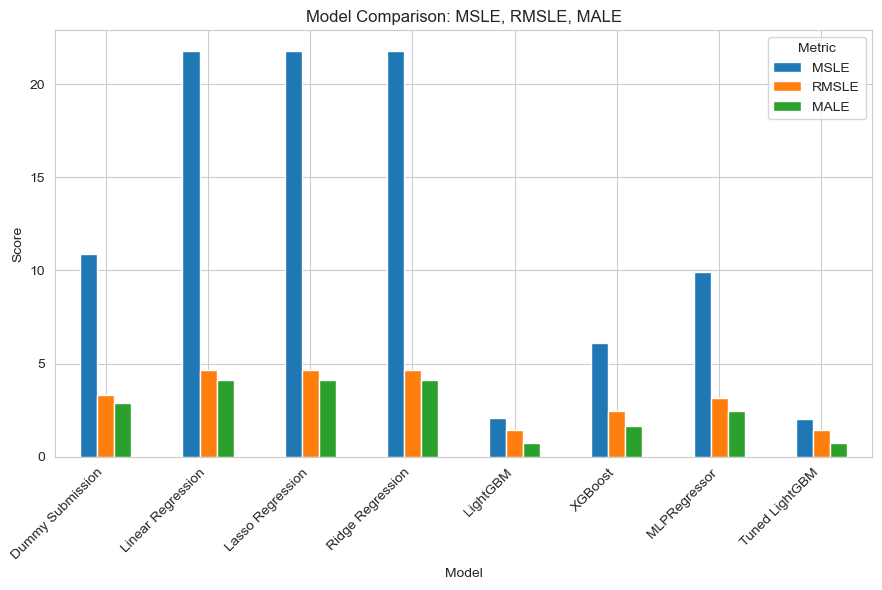

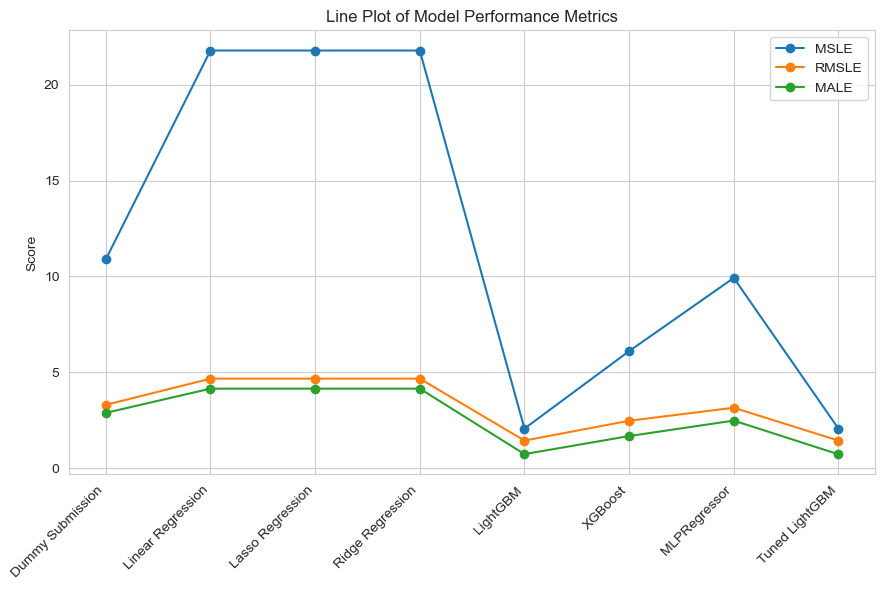

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Model scores
data = {
    'Model': [
        'Dummy Submission', 'Linear Regression', 'Lasso Regression',
        'Ridge Regression', 'LightGBM', 'XGBoost',
        'MLPRegressor', 'Tuned LightGBM'
    ],
    'MSLE': [10.8945, 21.7931, 21.7931, 21.7931, 2.0618, 6.1041, 9.9258, 2.05875],
    'RMSLE': [3.3007, 4.6683, 4.6683, 4.6683, 1.4359, 2.4706, 3.1505, 1.43483],
    'MALE': [2.8839, 4.1455, 4.1455, 4.1455, 0.7295, 1.6720, 2.4788, 0.72109],
}

df = pd.DataFrame(data)

# --- 1. Bar Plot ---
df_plot = df.set_index('Model')

df_plot.plot(kind='bar', figsize=(9, 6))
plt.title('Model Comparison: MSLE, RMSLE, MALE')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Metric')
plt.grid(True)
plt.savefig("result1.png")
plt.show()

# --- 2. Line Plot ---
plt.figure(figsize=(9, 6))
for metric in ['MSLE', 'RMSLE', 'MALE']:
    plt.plot(df['Model'], df[metric], marker='o', label=metric)

plt.title('Line Plot of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("result2.png")
plt.show()

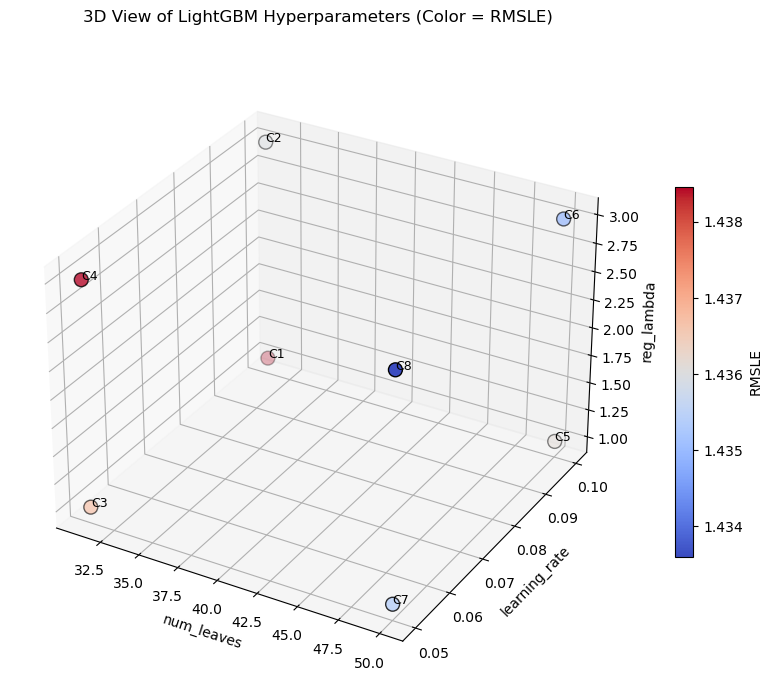

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
df = pd.DataFrame({
    "RMSLE": [1.43842, 1.43595, 1.43680, 1.43846, 1.43614, 1.43483, 1.43544, 1.43360],
    "num_leaves": [31]*4 + [50]*4,
    "learning_rate": [0.1, 0.1, 0.05, 0.05]*2,
    "reg_lambda": [1, 3, 1, 3]*2,
    "combo_id": [f"C{i+1}" for i in range(8)]
})

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df["num_leaves"],
    df["learning_rate"],
    df["reg_lambda"],
    c=df["RMSLE"],
    cmap='coolwarm',
    s=100,
    edgecolor='black'
)

# Label points
for i, row in df.iterrows():
    ax.text(row["num_leaves"], row["learning_rate"], row["reg_lambda"], row["combo_id"], fontsize=9)

# Axis labels
ax.set_xlabel("num_leaves")
ax.set_ylabel("learning_rate")
ax.set_zlabel("reg_lambda")
ax.set_title("3D View of LightGBM Hyperparameters (Color = RMSLE)", pad=30)

# Colorbar
cbar = fig.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("RMSLE")

plt.tight_layout()
plt.savefig('3d_hyper.png')
plt.show()